In [1]:
!pip install opencv-python

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
image = cv2.imread("five.jpg")

In [7]:
type(image)

numpy.ndarray

In [8]:
image.shape

(399, 657, 3)

In [9]:
new_image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

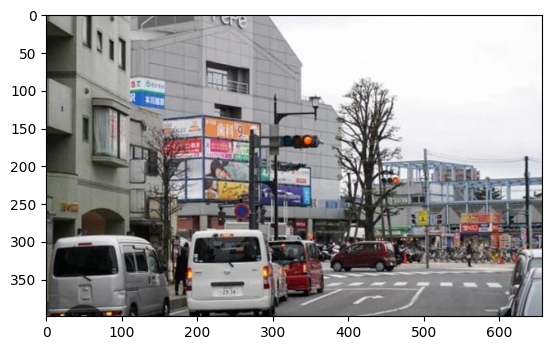

In [10]:
plt.imshow(new_image)

In [11]:
r,g,b =cv2.split(new_image)
print('r', r.shape)
print('g', g.shape)
print('b', b.shape)


r (399, 657)
g (399, 657)
b (399, 657)


In [12]:
new_image= cv2.merge((r,g,b))

In [13]:
s=10
w= int(new_image.shape[1]*s/100)
h= int(new_image.shape[0]*s/100)
dim=(w,h)
re_size = cv2.resize(new_image, dim, interpolation= cv2. INTER_AREA)
re_size.shape

(39, 65, 3)

In [14]:
(h,w)=new_image.shape[:2]
c=(w/2, h/2)
angle=90
m=cv2.getRotationMatrix2D(c, angle, 1.0)
rotate_90 = cv2.warpAffine(new_image, m, (h,w))



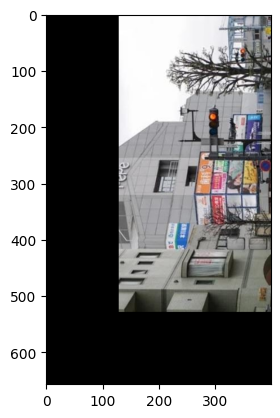

In [15]:
plt.imshow(rotate_90)

In [16]:
yolo = cv2.dnn.readNet("yolov3-tiny.weights", "yolov3-tiny.cfg")

In [17]:
classes = []
with open("coco.names","r")as f:
    classes = f.read().splitlines()

In [18]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [19]:
len(classes)

80

In [21]:
img = cv2.imread("five.jpg")
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320),(0,0,0), swapRB=True, crop = False)

In [22]:
blob.shape

(1, 3, 320, 320)

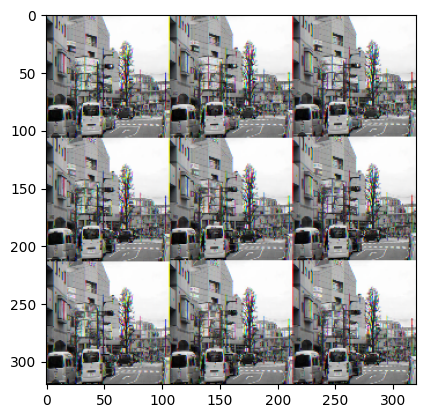

In [23]:
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [24]:
yolo.setInput(blob)

In [25]:
output_layers_name = yolo.getUnconnectedOutLayersNames()
layeroutput= yolo.forward(output_layers_name)

In [26]:
boxes=[]
confidences=[]
class_ids=[]

for output in layeroutput:
    for detection in output:
        score= detection[5:]
        class_id= np.argmax(score)
        confidence= score[class_id]
        if confidence > 0.7:

            center_x= int(detection[0]*width) 
            center_y = int(detection[0]*height) 
            W = int(detection[0]*width)
            h = int(detection[0]*height)
            x= int(center_x- w/2) 
            y = int(center_y-h/2)

            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_id.append(class_id)
 

In [27]:
len(boxes)

0

In [28]:
indexes= cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [29]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size =(len(boxes),3))

In [30]:
indexes = np.array(indexes).flatten()
for i in indexes:
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color= colors[i]
    cv2.rectangle(img, (x,y),(x+w, y+h), color, 2)
    cv2.putText(img, label+ " "+confi, (x,y+20), font, 2, (255,255,255), 1)

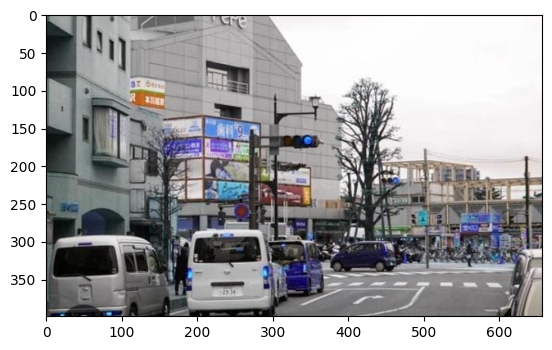

In [31]:
plt.imshow(img)

In [32]:
cv2.imwrite("five.jpg",img)

True